# Self Driving Cars con SVM
El objetivo de este ejercicio es entrenar un modelo usando SVM. Los datos se simulan artificialmente; luego se entrena un clasificador, se hace una predicción y finalmente de muestra la precisión del algoritmo.

Además, se crea un gráfico que muestra los puntos de test y el límite de decisión.

## Simular datos del terreno

In [1]:
import random

def makeTerrainData(n_points=1000):
##################################################################
### fake dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

    ### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test

## Dibujar puntos y límite de decisión

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def prettyPicture(clf, features_test, labels_test):
    x_min = 0.0
    x_max = 1.0
    y_min = 0.0
    y_max = 1.0

    h = .01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)

    test_pred = clf.predict(features_test)  # Get predictions for test points
    grade_fast_test = [features_test[ii][0] for ii in range(0, len(features_test)) if test_pred[ii] == 0]
    bumpy_fast_test = [features_test[ii][1] for ii in range(0, len(features_test)) if test_pred[ii] == 0]
    grade_slow_test = [features_test[ii][0] for ii in range(0, len(features_test)) if test_pred[ii] == 1]
    bumpy_slow_test = [features_test[ii][1] for ii in range(0, len(features_test)) if test_pred[ii] == 1]

    plt.scatter(grade_fast_test, bumpy_fast_test, color='c', label='Rápido')
    plt.scatter(grade_slow_test, bumpy_slow_test, color='m', label='Lento')

    plt.xlabel('Baches')
    plt.ylabel('Pendiente')
    plt.legend()

    plt.savefig('decision_boundary.png')
    plt.show()

## Clasificar usando SVM

En esta sección de código se presenta la función "classify".

Documentación de [Sklearn SVM](https://scikit-learn.org/stable/modules/svm.html).

In [3]:
def classify(features_train, labels_train):
    ### Importar el módulo sklearn para SVM
    from sklearn.svm import SVC

    ### Crear el clasificador SVM
    clf = SVC(kernel='linear')

    ### Entrenar el clasificador usando características y etiquetas de entrenamiento
    clf.fit(features_train, labels_train)
    return clf

## Predecir los puntos de test

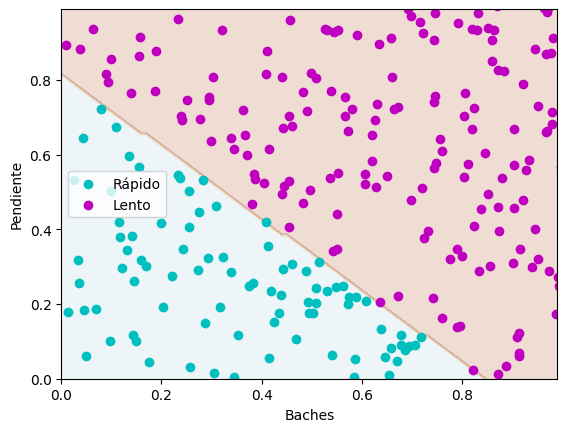

In [4]:
""" Clasificador SVM para clasificar los datos del terreno.
    Recrea el límite de decisión y grafica """

import numpy as np
import pylab as pl


features_train, labels_train, features_test, labels_test = makeTerrainData()

clf = classify(features_train, labels_train)

#### Guardar las predicciones en una lista 'predicciones'
predicciones = clf.predict(features_test)

### Graficar los puntos de test y el límite de decisión
prettyPicture(clf, features_test, labels_test)

## Precisión del algoritmo

Código para calcular la puntuación (score) del algoritmo, evaluado en los datos de test.

Documentación de [Sklearn SVM](https://scikit-learn.org/stable/modules/svm.html).

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predicciones, labels_test)

print ("La precisión es", accuracy)

La precisión es 0.92


## Kernels y parámetros en SVM

In [ ]:
def classifyRBF(features_train, labels_train):
    ### Importar el módulo sklearn para SVM
    from sklearn.svm import SVC
    clf = SVC(kernel='rbf')
    clf.fit(features_train, labels_train)
    return clf

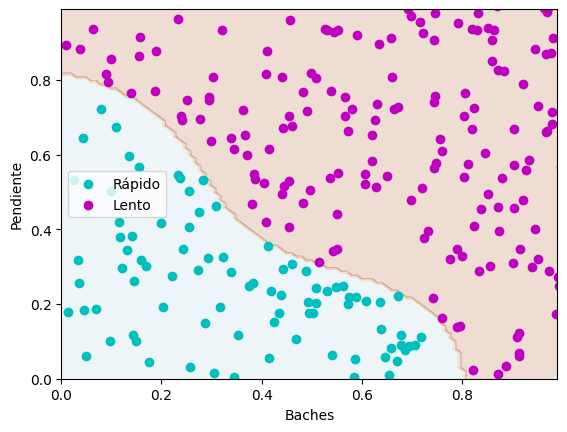

In [ ]:
""" Clasificador SVM para clasificar los datos del terreno.
    Recrea el límite de decisión y grafica """

import numpy as np
import pylab as pl

features_train, labels_train, features_test, labels_test = makeTerrainData()

clfrbf = classifyRBF(features_train, labels_train)

#### Guardar las predicciones en una lista 'predicciones'
predicciones = clfrbf.predict(features_test)

### Graficar los puntos de test y el límite de decisión
prettyPicture(clfrbf, features_test, labels_test)

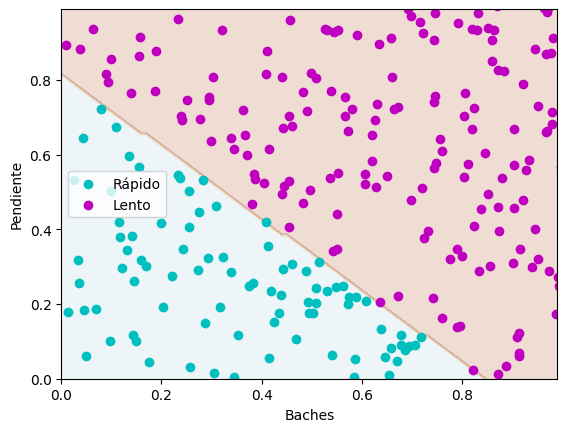

In [ ]:
## Clasificador SVM lineal
prettyPicture(clf, features_test, labels_test)

## Precisión

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predicciones, labels_test)

print ("La precisión es", accuracy)

La precisión es 0.928


## Añadiendo parámetros gamma y c

In [ ]:
def classifyRBFParams(features_train, labels_train):
    ### Importar el módulo sklearn para SVM
    from sklearn.svm import SVC
    clf = SVC(kernel='rbf', C=10000, gamma=1000)
    clf.fit(features_train, labels_train)
    return clf

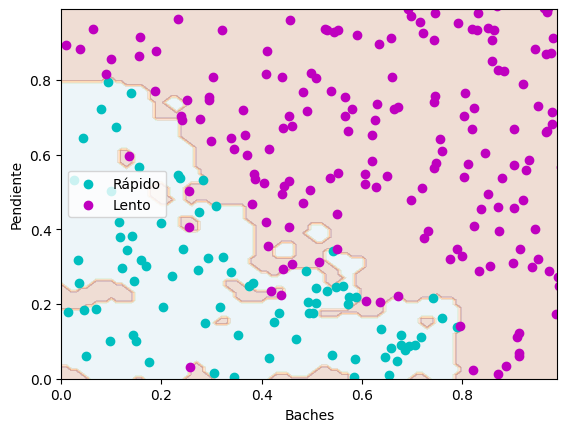

In [ ]:
clfrbfp = classifyRBFParams(features_train, labels_train)

#### Guardar las predicciones en una lista 'predicciones'
predicciones = clfrbfp.predict(features_test)

### Graficar los puntos de test y el límite de decisión
prettyPicture(clfrbfp, features_test, labels_test)

In [ ]:
print ("La precisión es", accuracy_score(predicciones, labels_test))

La precisión es 0.912
